# Лабораторная работа №1. 

Данная лабораторная работа состоит из нескольких блоков. В каждом блоке вам предлагается произвести некоторые манипуляции с данными и сделать некоторые выводы.
* Задавать вопросы можно и нужно.
* Списывать не нужно. Работы, которые были списаны обнуляются.
* Блоки выполняются последовательно и оцениваются отдельно.

__Вторая часть задания про градиентный бустинг и третья про SVM ждут вас в соседних ноутбуках.__

## Часть 1. Работа с моделями и ансамблями моделей в задачи классификации.

### 1. Чтение данных.
Воспользуемся [датасетом](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), в котором описываются различные автомобили. Будем решать задачу многоклассовой ($k=4$) классификации.
Для удобства, датасет уже преобразован в удобный формат.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


Для первичного анализа может быть полезна библиотека `pandas`. Преобразуем `train` выборку в `pd.DataFrame`.

In [3]:
X_train_pd = pd.DataFrame(X_train)

# First 5 rows of our dataset.
X_train_pd.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,646,90,38,79,185,69,6,160,40,20,130,178,393,133,66,2,14,198,205
1,828,89,42,66,125,53,7,131,51,18,144,162,254,162,73,10,17,188,191
2,260,83,37,54,118,55,4,129,52,18,127,146,245,140,81,4,13,180,184
3,425,89,36,69,142,57,7,135,50,18,126,154,266,128,66,3,36,193,203
4,47,85,42,66,122,54,6,148,46,19,141,172,317,174,88,6,14,180,182


Воспользовавшись методами `describe` и `info` можно получить полезную информацию о датасете.

In [4]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,422.608379,93.830601,44.947177,82.262295,169.918033,61.934426,8.633880,169.435337,40.721311,20.621129,148.398907,189.071038,442.398907,174.446266,72.384335,6.258652,12.402550,189.178506,195.923497
std,246.260769,8.183931,6.170549,15.590461,33.488022,8.083465,4.641413,32.706418,7.605506,2.559224,14.630213,30.735160,173.636112,32.233683,7.659961,4.908147,8.817082,6.251497,7.359485
min,0.000000,73.000000,34.000000,42.000000,109.000000,47.000000,2.000000,114.000000,26.000000,17.000000,118.000000,131.000000,191.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,205.000000,88.000000,40.000000,70.000000,142.000000,57.000000,7.000000,148.000000,33.000000,19.000000,137.000000,168.000000,322.000000,150.000000,67.000000,2.000000,5.000000,185.000000,191.000000
50%,425.000000,93.000000,44.000000,80.000000,169.000000,62.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,366.000000,173.000000,71.000000,5.000000,11.000000,189.000000,197.000000
75%,640.000000,100.000000,50.000000,98.000000,196.000000,65.000000,10.000000,200.000000,45.000000,23.000000,161.000000,217.000000,598.000000,198.000000,75.000000,9.000000,18.000000,193.000000,201.000000
max,845.000000,119.000000,59.000000,112.000000,333.000000,138.000000,55.000000,265.000000,59.000000,29.000000,186.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,40.000000,206.000000,211.000000


In [5]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Работа с данными, построение модели, анализ ошибки.
Выполните следующие манипуляции с данными:

#### 2.0. Предобработка данных.
* Произведите необходимые (по вашему мнению) манипуляции с данными и объясните их.

In [6]:
### YOUR CODE HERE
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train_pd)
X_test_scaled = sc.transform(X_test)

#### 2.1. Базовая логистическая регрессия.
* Подберите оптимальные параметры логистической регресии с помощью кросс-валидации на train-датасете (е переусердствуйте с подбором, в данной работе не стоит задача найти самую оптимальную модель. Небольшого grid/random search'а хватит).

* Постройте график ROC-кривой для данного классификатора (`sklearn.metrics.roc_curve`), оцените точность классификации и f1-score. 

In [7]:
### YOUR CODE HERE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_curve, accuracy_score, f1_score

random_search = RandomizedSearchCV(LogisticRegression(max_iter=4000), 
                                   param_distributions={'C': [0.01, 0.1, 0.3, 0.5, 1., 10.]})
random_search.fit(X_train_scaled, y_train)

/Users/ivangoldov/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:282: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


RandomizedSearchCV(estimator=LogisticRegression(max_iter=4000),
                   param_distributions={'C': [0.01, 0.1, 0.3, 0.5, 1.0, 10.0]})

In [9]:
print('Best parameters are: {}'.format(random_search.best_params_))
y_preds_lr = random_search.predict(X_test_scaled)
print('Accuracy: {}'.format(round(accuracy_score(y_test, y_preds_lr), 2)))
print('f1-score: {}'.format(round(f1_score(y_test, y_preds_lr, average='weighted'), 2)))

Best parameters are: {'C': 10.0}
Accuracy: 0.81
f1-score: 0.81


#### 2.2. Зависимость объясненной дисперсии от числа главных компонент.
Воспользуемся методом главных компонент (PCA). 

Примените его к train-части данных.
Постройте график зависимости объясненной дисперсии (explained variance ratio) от количества главных компонент.

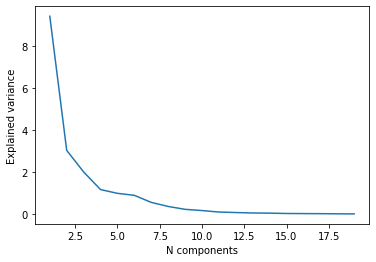

In [10]:
### YOUR CODE HERE
from sklearn.decomposition import PCA

pca = PCA(n_components=X_train_pd.shape[1])
pca.fit(X_train_scaled)
plt.plot(np.arange(1, 20), pca.explained_variance_)
plt.ylabel('Explained variance')
plt.xlabel('N components');

#### 2.3. Преобразование с помощью PCA.
Выберите определенное число компонент. Кратко опишите, чем обусловлен ваш выбор.

Используя эти главные компоненты, преобразуйте train и test выборки (используя методы `fit` и `transform`).

In [27]:
### YOUR CODE HERE

pca_new = PCA(n_components=13)
X_train_scaled_pca = pca_new.fit_transform(X_train_scaled)
X_test_scaled_pca = pca_new.transform(X_test_scaled)

#### 2.4. Логистическая регрессия над преобразованными данными.
* Подберите оптимальные параметры логистической регресии с помощью кросс-валидации на преобразованном train-датасете.

* Постройте график ROC-кривой для полученных классификаторов, оцените точность классификации и f1-score. 

In [28]:
### YOUR CODE HERE

random_search_pca = RandomizedSearchCV(LogisticRegression(max_iter=4000), 
                                       param_distributions={'C': [0.01, 0.1, 0.3, 0.5, 1., 10.]})
random_search_pca.fit(X_train_scaled_pca, y_train)
print('Best parameters are: {}'.format(random_search_pca.best_params_))
y_preds_lr_pca = random_search_pca.predict(X_test_scaled_pca)
print('Accuracy: {}'.format(round(accuracy_score(y_test, y_preds_lr_pca), 2)))
print('f1-score: {}'.format(round(f1_score(y_test, y_preds_lr_pca, average='weighted'), 2)))

/Users/ivangoldov/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:282: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


Best parameters are: {'C': 0.5}
Accuracy: 0.75
f1-score: 0.74


#### 2.5. Решающее дерево.
Рассмотрим поведение решающего дерева на исходных и преобразованных данных. Будем варьировать лишь один параметр - максимальную глубину дерева. 

* С помощью кросс-валидации подберите оптимальный параметр `max_depth` и оцените на исходных и преобразованных данных те же метрики, что и выше.

In [32]:
from sklearn.tree import DecisionTreeClassifier

# YOUR CODE HERE

random_search_tree = RandomizedSearchCV(DecisionTreeClassifier(), 
                                        param_distributions={'max_depth': [i for i in range(2, 16)]})
random_search_tree.fit(X_train_scaled_pca, y_train)
print('Best parameters are: {}'.format(random_search_tree.best_params_))
y_preds_lr_tree = random_search_tree.predict(X_test_scaled_pca)
print('Accuracy: {}'.format(round(accuracy_score(y_test, y_preds_lr_tree), 2)))
print('f1-score: {}'.format(round(f1_score(y_test, y_preds_lr_tree, average='weighted'), 2)))

Best parameters are: {'max_depth': 8}
Accuracy: 0.64
f1-score: 0.64


#### 2.6. Bagging.
Перейдем к ансамблям. 

Для построения ансамбля воспользуемся Bagging'ом с числом алгоритмов от 2 до 50. В качестве первого семейства базовых алгоримтов будем использовать линейные модели (т.е. логистическую регрессию), в качестве второго - решающие деревья. 

*Пояснение: Будем строить ансамбль только из моделей из одного семейства, т.е. логистическая регрессия не смешивается с решающими деревьями.*

Для этого можно сгенерировать с помощью метода bootstrap 50 подвыборок из `train` выборки (того же размера, что и исходная), обучить логистическую регрессию и решающее дерево с оптимальными параметрами из предыдущего пункта на каждой из подвыборок и затем усреднить предсказания k моделей.

*Hint: в sklearn может найтись подходящая функция, которая облегчит вам реализацию данного пункта.*

* Постройте график качества классификации и f1-score на `train` и `test` датасетах в зависимости от числа алгоритмов, вошедших в ансамбль.

* Проанализируйте график. Какое количество моделей стоит использовать? Как вы думаете, являются ли параметры решающего дерева, подобранные в предыдущем пункте оптимальными в данном случае?

In [44]:
# YOUR CODE HERE
from sklearn.ensemble import BaggingClassifier

f1_scores_lr = []
f1_scores_tree = []
N = [_ for _ in range(2, 51)]
for n in N:
    bagging_lr = BaggingClassifier(LogisticRegression(C=0.5), n_estimators=n)
    bagging_tree = BaggingClassifier(DecisionTreeClassifier(max_depth=8), n_estimators=n)
    bagging_lr.fit(X_train_scaled_pca, y_train)
    bagging_tree.fit(X_train_scaled_pca, y_train)
    f1_scores_lr.append(f1_score(y_test, bagging_lr.predict(X_test_scaled_pca), average='weighted'))
    f1_scores_tree.append(f1_score(y_test, bagging_tree.predict(X_test_scaled_pca), average='weighted'))

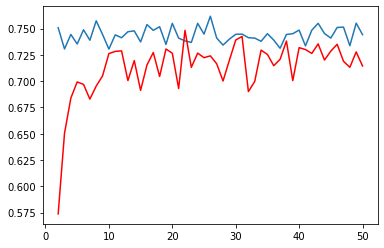

In [46]:
plt.plot(N, f1_scores_lr)
plt.plot(N, f1_scores_tree, c='r');

#### 2.7. Random Forest.
Теперь воспользуйтесь `sklearn`-реализацией алгоритма Random Forest. 

* Постройте аналогичные графики для него (изменяя число деревьев от 1 до 50). Остальные параметры можно оставить по умолчанию.

* Проанализируйте полученные результаты. Каким получилось оптимальное число деревьев. Как оно соотносится с оптимальным числом деревьев и линейных моделей в bagging'е из предыдущего пункта?

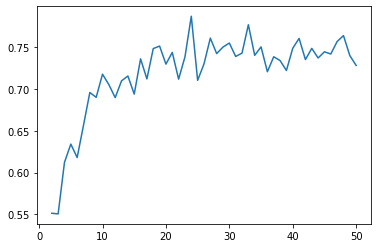

In [48]:
from sklearn.ensemble import RandomForestClassifier

# YOUR CODE HERE
f1_scores_random_tree = []
for n in N:
    model = RandomForestClassifier(n_estimators=n)
    model.fit(X_train_scaled_pca, y_train)
    f1_scores_random_tree.append(f1_score(y_test, model.predict(X_test_scaled_pca), average='weighted'))
plt.plot(N, f1_scores_random_tree);

#### 2.8. Кривая обучения.
* Поделите обучающую выборку на 10 примерно равных частей. Обучите логистическую регрессию (с оптимальными параметрами), решающее дерево (аналогично), бэггинг над логистическими регрессиями и решающими деревьями (с выбранными параметрами) и RandomForest (из предыдущего пункта) на одной, двух, трех и т.д. частях.

* Постройти график f1-score и accuracy на `train` и `test` датасетах в зависимости от размера обучающей выборки.

* Проанализируйте полученный график. Можно ли сделать из него какие-либо выводы? Если да - кратко опишите их.

In [50]:
# YOUR CODE HERE